# **EDA, Feature Engineering, Hypothesis Testing, and Time Series Analysis on Fantom (FTM) Historical Prices Dataset**

### **Introduction**

##### About Fantom
The Fantom Foundation is dedicated to building the infrastructure for a more democratic and efficient future. Our team is made up of engineers, scientists, researchers, designers, and entrepreneurs who share the same vision. Together, we’re working to improve everyone’s lives by making advanced technologies more accessible and seamlessly integrated. True to the maxim of decentralization, our team is distributed across the world. [(source)](https://fantom.foundation/about/)

##### About CoinMarketCap
CoinMarketCap is the world's most-referenced price-tracking website for cryptoassets in the rapidly growing cryptocurrency space. Its mission is to make crypto discoverable and efficient globally by empowering retail users with unbiased, high quality and accurate information for drawing their own informed conclusions.[(source)](https://coinmarketcap.com/about/)

### **Dataset Overview**

##### Feature Information

* open: Open price per day
* high: Highest price per day
* low: Lowest price per day
* close: Close price per day
* volume: Sum total of actual trades taking plac
* marketCap: Total value of all the coins that have been mined
* timestamp: Date and time

##### Source

Dataset was scraped from [CoinMarketCap](https://coinmarketcap.com).
You can scrape the latest data by yourself using <code>[scraper.py](https://github.com/berodimas/one-month-one-dataset/blob/master/%5B2022-02%5D%20NFT%20Price%20Analysis%20and%20Regression/data/scraper.py)</code> python script on <code>data</code> folder. The script basically only get last 365 days of historical data, you can configure your own date range by changing <code>days</code> parameter on <code>timedelta()</code> function. 


### **Section 1: Setup, Load, and Clean** 

In [1]:
import os
data_path = ['./data']

In [2]:
## Import neccessary libraries to load data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# # Run the scraper script to get the latest data
# from data.scraper import scraper
# from datetime import datetime
# scraper()

In [4]:
## Load in the Dataset
filepath = os.sep.join(
    data_path + ['2022-03-28_FTM.csv'])
df = pd.read_csv(filepath)

In [5]:
## Examine the information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       365 non-null    float64
 1   high       365 non-null    float64
 2   low        365 non-null    float64
 3   close      365 non-null    float64
 4   volume     365 non-null    float64
 5   marketCap  365 non-null    float64
 6   timestamp  365 non-null    object 
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [6]:
## Set timestamp to datetime dtype and set it to index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [7]:
df.head()

,open,high,low,close,volume,marketCap
timestamp,,,,,,
2021-03-28 23:59:59.999000+00:00,0.360041,0.419649,0.354519,0.393943,1.190319e+08,1.002588e+09
2021-03-29 23:59:59.999000+00:00,0.393729,0.438397,0.384409,0.432068,1.148778e+08,1.099615e+09
2021-03-30 23:59:59.999000+00:00,0.432711,0.478602,0.423105,0.432618,1.497082e+08,1.101017e+09
2021-03-31 23:59:59.999000+00:00,0.432525,0.446946,0.391088,0.423144,1.328263e+08,1.076905e+09
2021-04-01 23:59:59.999000+00:00,0.422651,0.457409,0.410224,0.444327,1.140365e+08,1.130814e+09


In [8]:
## Create a dataframe with only close price
dataframe_ftm = df[['close']]

### **Section 2: Simple Exploratory Data Analysis (EDA)**

In [9]:
## Import neccessary libraries for EDA
from colorsetup import colors, palette
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plotsize = (13, 5)
sns.set_palette(palette)

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

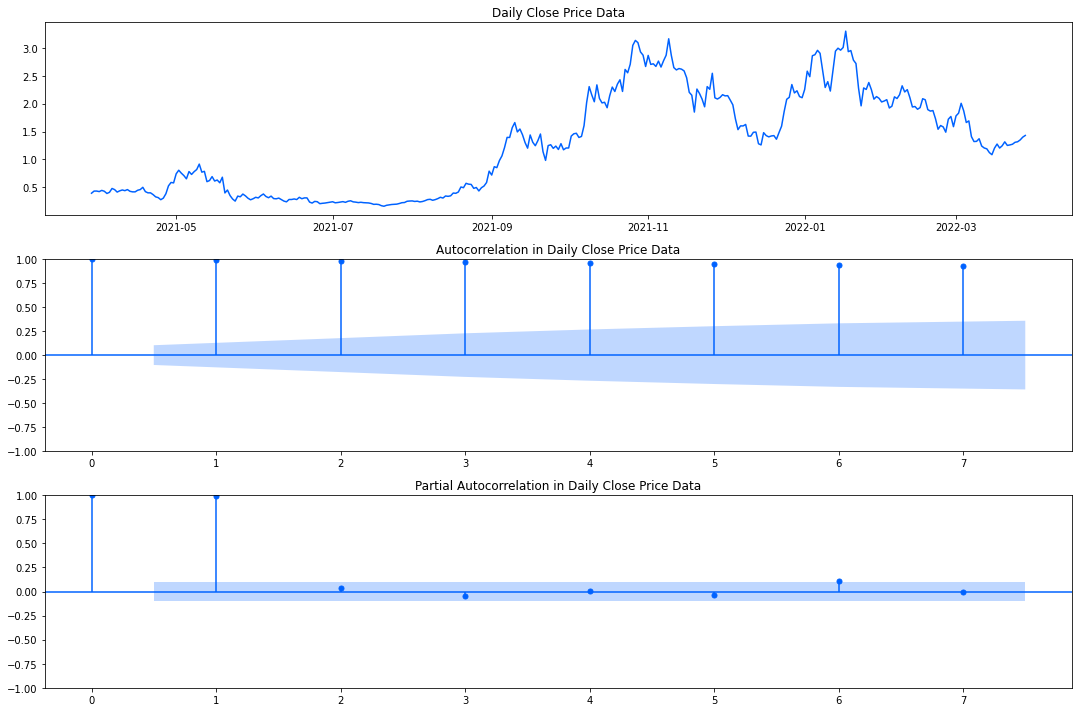

In [11]:
## Display and visualize Daily Close Price Data
fig, axes = plt.subplots(3, 1, figsize=(15, 10),)
axes[0].plot(dataframe_ftm)
axes[0].title.set_text('Daily Close Price Data')
plot_acf(dataframe_ftm['close'], lags=7, ax=axes[1],
         title='Autocorrelation in Daily Close Price Data')
plot_pacf(dataframe_ftm['close'], lags=7, ax=axes[2],
          title='Partial Autocorrelation in Daily Close Price Data')
fig.tight_layout()
plt.show()


In [12]:
## Import neccessary libraries for Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose


In [13]:
ss_decomposition = seasonal_decompose(
    x=dataframe_ftm['close'], model='additive', period=7)

estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid


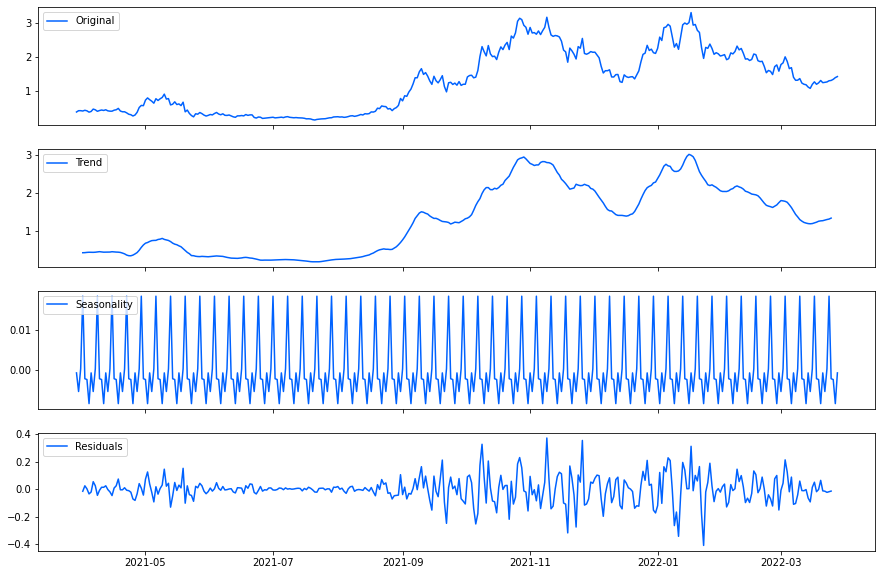

In [14]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataframe_ftm['close'], label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left')

### **Section 3: Stationarity**

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def dftest(timeseries):
    dftest = adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', 'Lags Used', 'Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig, axes = plt.subplots(figsize=(15, 10))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)


Test Statistic           -1.523105
p-value                   0.522052
Lags Used                 0.000000
Observations Used       364.000000
Critical Value (1%)      -3.448443
Critical Value (5%)      -2.869513
Critical Value (10%)     -2.571018
dtype: float64


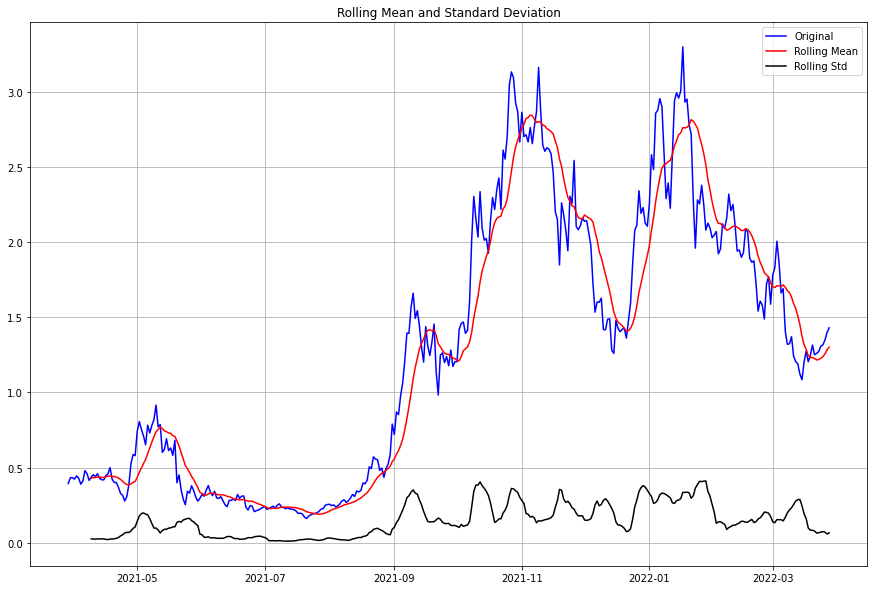

In [17]:
dftest(dataframe_ftm)


In [18]:
dataframe_log_trans = dataframe_ftm.copy()

In [19]:
dataframe_log_trans['close'] = np.log(dataframe_log_trans['close'])

Test Statistic           -1.132100
p-value                   0.702103
Lags Used                 5.000000
Observations Used       359.000000
Critical Value (1%)      -3.448697
Critical Value (5%)      -2.869625
Critical Value (10%)     -2.571077
dtype: float64


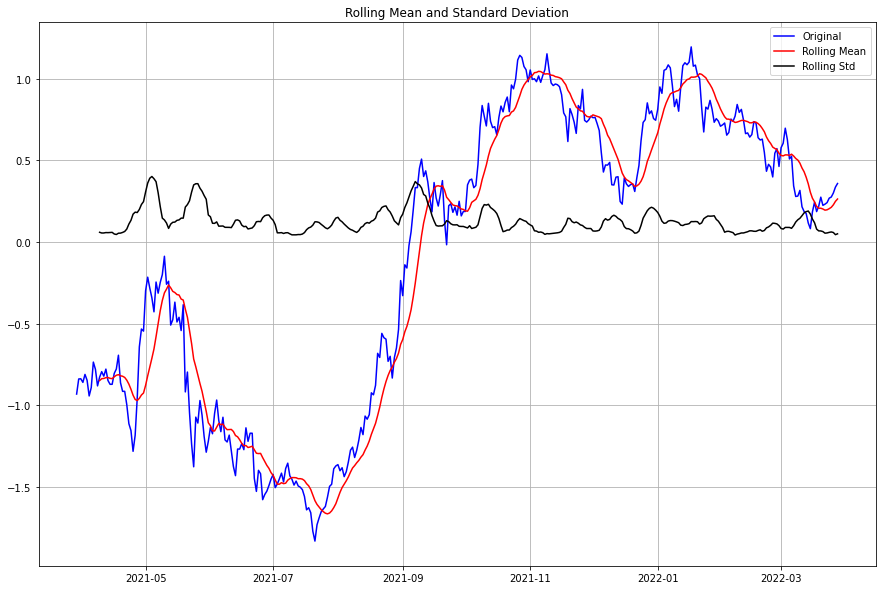

In [20]:
dftest(dataframe_log_trans)

In [21]:
dataframe_diff_trans = dataframe_log_trans.diff()
dataframe_diff_trans.dropna(inplace=True)

In [22]:
dataframe_diff_trans.head()

,close
timestamp,
2021-03-29 23:59:59.999000+00:00,0.092375
2021-03-30 23:59:59.999000+00:00,0.001273
2021-03-31 23:59:59.999000+00:00,-0.022143
2021-04-01 23:59:59.999000+00:00,0.048847
2021-04-02 23:59:59.999000+00:00,-0.035701


Test Statistic         -8.591698e+00
p-value                 7.256798e-14
Lags Used               4.000000e+00
Observations Used       3.590000e+02
Critical Value (1%)    -3.448697e+00
Critical Value (5%)    -2.869625e+00
Critical Value (10%)   -2.571077e+00
dtype: float64


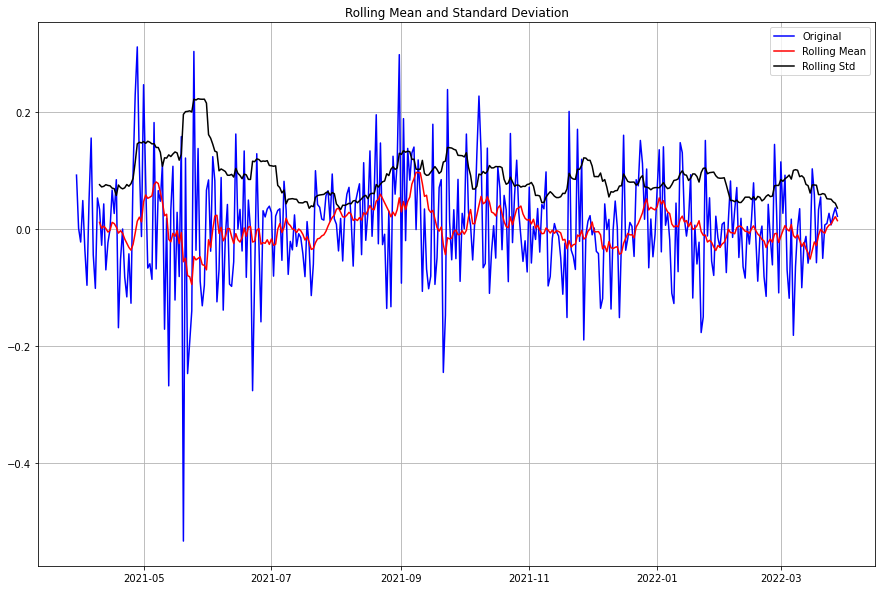

In [23]:
dftest(dataframe_diff_trans)

### **Section 4: Smoothing**

In [24]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(
        np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(
        np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(
        estimates), "Arrays must be of equal length"

    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)

    return mse

In [25]:
mytime = np.arange(len(dataframe_diff_trans))


In [26]:
size = 7

train = dataframe_diff_trans.to_numpy()[:-size]
test = dataframe_diff_trans.to_numpy()[-size:]

In [27]:
from statsmodels.tsa.api import ExponentialSmoothing

In [28]:
model = ExponentialSmoothing(
    train, trend="additive", seasonal="additive", seasonal_periods=7).fit(optimized=True)
preds = model.forecast(len(test))


In [29]:
model_mse = mse(test, preds)
print("MSE for Dataset: {:.7}".format(np.average(model_mse)))

MSE for Dataset: 0.004128685


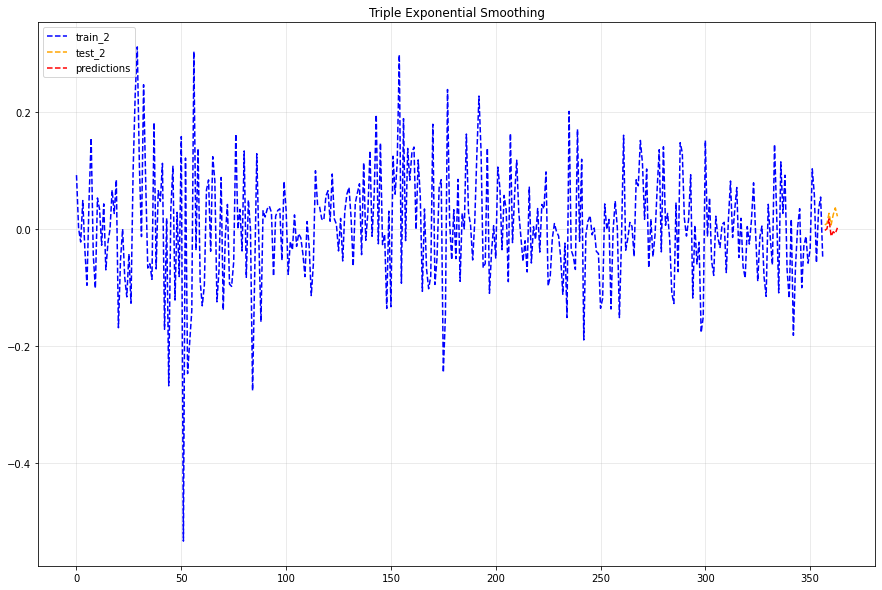

In [30]:
fig, axes = plt.subplots(figsize=(15, 10))
plt.plot(mytime[:-size], train, 'b--', label="train_2")
plt.plot(mytime[-size:], test, color='orange',
         linestyle="--", label="test_2")
plt.plot(mytime[-size:], preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)


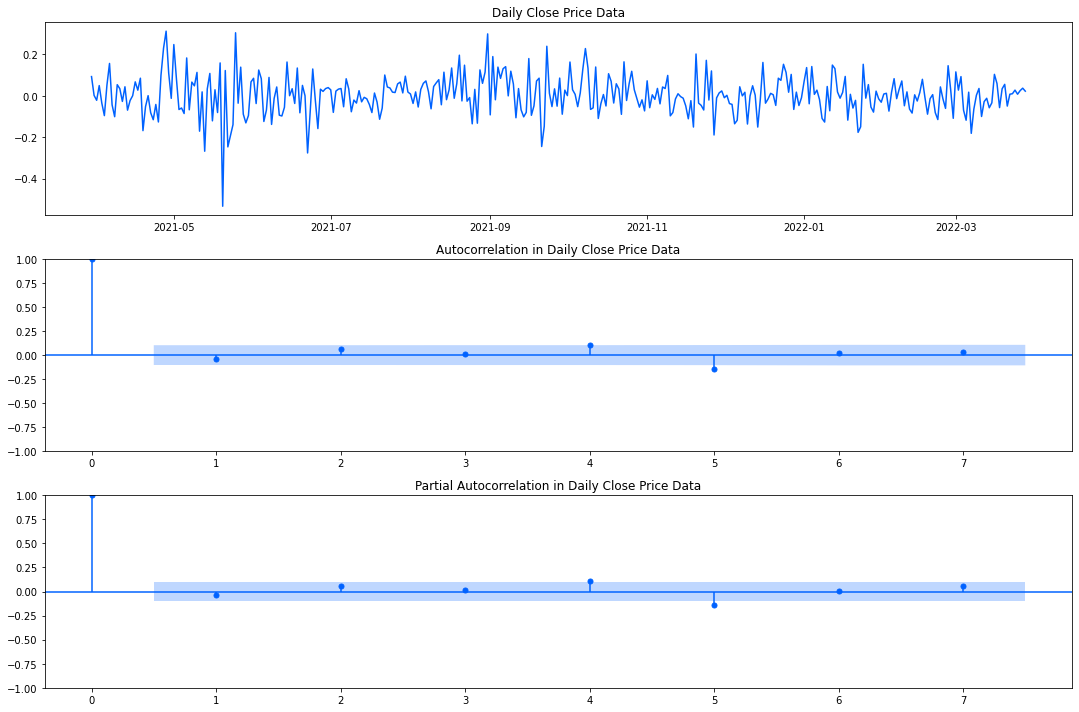

In [31]:
## Display and visualize Daily Close Price Data
fig, axes = plt.subplots(3, 1, figsize=(15, 10),)
axes[0].plot(dataframe_diff_trans)
axes[0].title.set_text('Daily Close Price Data')
plot_acf(dataframe_diff_trans['close'], lags=7, ax=axes[1],
         title='Autocorrelation in Daily Close Price Data')
plot_pacf(dataframe_diff_trans['close'], lags=7, ax=axes[2],
          title='Partial Autocorrelation in Daily Close Price Data')
fig.tight_layout()
plt.show()

### **Section 3: ARMA, ARIMA, AND SARIMA**

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [33]:
def cross_validate(series, horizon, start, step_size, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None):
    '''
    Function to determine in and out of sample testing of arima model    
    
    arguments
    ---------
    series (seris): time series input
    horizon (int): how far in advance forecast is needed
    start (int): starting location in series
    step_size (int): how often to recalculate forecast
    order (tuple): (p,d,q) order of the model
    seasonal_order (tuple): (P,D,Q,s) seasonal order of model
    
    Returns
    -------
    DataFrame: gives fcst and actuals with date of prediction
    '''
    fcst = []
    actual = []
    date = []
    for i in range(start, len(series)-horizon, step_size):
        model = SARIMAX(series[:i+1],  # only using data through to and including start
                                          order=order,
                                          seasonal_order=seasonal_order,
                                          trend=trend).fit()
        # forecasting horizon steps into the future
        fcst.append(model.forecast(steps=horizon)[-1])
        # comparing that to actual value at that point
        actual.append(series[i+horizon])
        date.append(series.index[i+horizon])  # saving date of that value
    return pd.DataFrame({'fcst': fcst, 'actual': actual}, index=date)


In [34]:
stepwise_model = pm.auto_arima(dataframe_diff_trans['close'], start_p=1, start_q=1,
                               max_p=3, max_q=3, m=7,
                               start_P=0, seasonal=True,
                               d=0, D=1, trace=True,
                               error_action='ignore',
                               suppress_warnings=True,
                               stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-419.174, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-499.832, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-421.173, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=-417.977, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=-544.897, Time=0.55 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=-546.652, Time=0.58 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=-501.102, Time=0.17 sec
 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=-544.866, Time=0.60 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=-546.672, Time=1.21 s

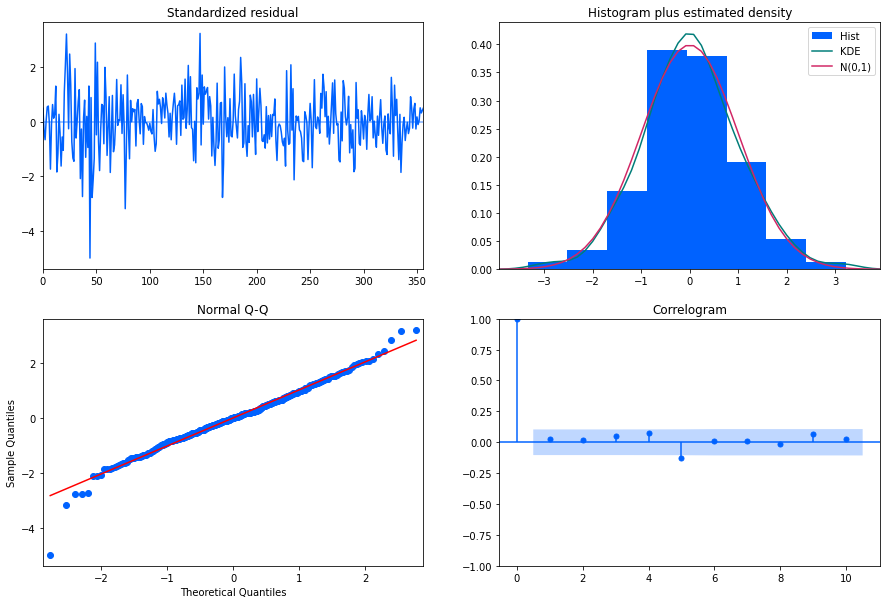

In [35]:
stepwise_model.plot_diagnostics(figsize=(15,10));

In [36]:
print('auto-fit order: :', stepwise_model.order)
print('auto-fit seasonal_order: :', stepwise_model.seasonal_order)

auto-fit order: : (1, 0, 1)
auto-fit seasonal_order: : (1, 1, 1, 7)


In [37]:
warnings.filterwarnings("ignore")
series = dataframe_diff_trans['close']
horizon = 7
start = int(len(dataframe_diff_trans) - 14)
step_size = 1
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

cv = cross_validate(series, horizon, start, step_size,
                         order=order,
                         seasonal_order=seasonal_order)


In [38]:
cv

,fcst,actual
2022-03-21 23:59:59.999000+00:00,0.000174,0.007178
2022-03-22 23:59:59.999000+00:00,0.009103,0.009608
2022-03-23 23:59:59.999000+00:00,0.024788,0.027002
2022-03-24 23:59:59.999000+00:00,-0.011203,0.007148
2022-03-25 23:59:59.999000+00:00,0.001110,0.024535
2022-03-26 23:59:59.999000+00:00,-0.000272,0.036341
2022-03-27 23:59:59.999000+00:00,0.003581,0.021892


In [44]:
inv_cv = cv.copy()
inv_cv.iloc[0] = np.log(dataframe_ftm['close'][-7:].iloc[0])
res = np.exp(inv_cv.cumsum())

In [45]:
res

,fcst,actual
2022-03-21 23:59:59.999000+00:00,1.260130,1.260130
2022-03-22 23:59:59.999000+00:00,1.271653,1.272296
2022-03-23 23:59:59.999000+00:00,1.303569,1.307119
2022-03-24 23:59:59.999000+00:00,1.289047,1.316496
2022-03-25 23:59:59.999000+00:00,1.290478,1.349196
2022-03-26 23:59:59.999000+00:00,1.290126,1.399129
2022-03-27 23:59:59.999000+00:00,1.294754,1.430095


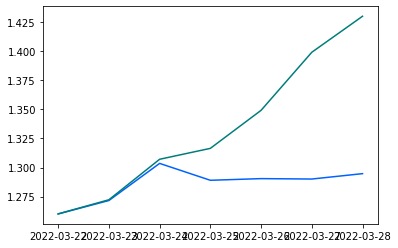

In [46]:
plt.plot(res)

In [47]:
#Defining an error metric to see out of sample accuracy
def mape(df_cv):
    return abs(df_cv.actual - df_cv.fcst).sum() / df_cv.actual.sum()


In [48]:
mape(inv_cv)

0.27791182963137306


---
**2022 | Dimas Adrian Mukti / [@berodimas](https://berodimas.netlify.app/)**